In [6]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm



In [7]:
ls

 Volume in drive D is Misc
 Volume Serial Number is 12AE-9D59

 Directory of D:\Projects\ADCME-diff\2d_v01

10/12/2020  01:06 PM    <DIR>          .
10/12/2020  01:06 PM    <DIR>          ..
06/14/2020  09:39 PM    <DIR>          .ipynb_checkpoints
06/17/2020  02:48 AM           319,359 ADCME_darcy_V_1D_run-Clean.ipynb
06/14/2020  09:49 AM    <DIR>          data
06/14/2020  10:10 AM         3,667,598 EXP_2020_06_13_235302_k_x.txt
06/14/2020  10:10 AM         3,628,800 EXP_2020_06_13_235302_k_y.txt
06/14/2020  10:10 AM             8,521 EXP_2020_06_13_235302_p.txt
06/14/2020  10:10 AM         3,665,080 EXP_2020_06_13_235302_q_x.txt
06/14/2020  10:10 AM         3,665,080 EXP_2020_06_13_235302_q_y.txt
06/14/2020  10:06 PM         1,211,598 EXP_2020_06_14_114500_k_x.txt
06/14/2020  10:06 PM         1,211,598 EXP_2020_06_14_114500_k_y.txt
06/14/2020  10:06 PM             2,784 EXP_2020_06_14_114500_p.txt
06/14/2020  10:06 PM         1,235,754 EXP_2020_06_14_114500_q_x.txt
06/14/2020  10:06 

In [8]:
df_k_imp = pd.read_csv("./EXP_2020_06_14_184829_k_x.txt",sep='\t',header=None)

In [9]:
df_q_imp = pd.read_csv("./EXP_2020_06_14_184829_p.txt",sep='\t',header=None)

In [10]:
df_q_imp

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.178291,0.262228,0.178029,0.381452,7.277301e-45,6.204503e-45,1.268666e-44,1.428092e-44,8.151153e-45,8.726932e-45,...,6.210873e-45,9.720277e-45,1.142011e-44,8.984603e-45,1.092362e-44,1.051543e-44,8.034946e-45,6.452224e-45,9.086774e-45,1.224253e-44
1,0.080263,0.178082,0.080063,0.661591,5.085403e-45,4.335728e-45,8.865482e-45,9.979555e-45,5.696054e-45,6.098410e-45,...,4.340180e-45,6.792563e-45,7.980412e-45,6.278472e-45,7.633462e-45,7.348217e-45,5.614848e-45,4.508836e-45,6.349869e-45,8.555126e-45
2,0.076781,0.172031,0.076446,0.674742,4.953056e-45,4.222891e-45,8.634758e-45,9.719837e-45,5.547815e-45,5.939700e-45,...,4.227227e-45,6.615787e-45,7.772722e-45,6.115075e-45,7.434801e-45,7.156980e-45,5.468722e-45,4.391494e-45,6.184614e-45,8.332479e-45
3,0.073098,0.164720,0.072893,0.689289,4.808066e-45,4.099275e-45,8.381994e-45,9.435309e-45,5.385414e-45,5.765827e-45,...,4.103484e-45,6.422124e-45,7.545192e-45,5.936069e-45,7.217163e-45,6.947474e-45,5.308637e-45,4.262942e-45,6.003573e-45,8.088564e-45
4,0.069390,0.157369,0.068990,0.704251,4.652845e-45,3.966936e-45,8.111394e-45,9.130705e-45,5.211554e-45,5.579686e-45,...,3.971009e-45,6.214795e-45,7.301606e-45,5.744432e-45,6.984168e-45,6.723186e-45,5.137255e-45,4.125320e-45,5.809756e-45,7.827436e-45
5,0.065706,0.150119,0.065209,0.718966,4.495726e-45,3.832979e-45,7.837485e-45,8.822375e-45,5.035568e-45,5.391269e-45,...,3.836915e-45,6.004932e-45,7.055043e-45,5.550452e-45,6.748324e-45,6.496155e-45,4.963779e-45,3.986014e-45,5.613570e-45,7.563116e-45
6,0.062109,0.142086,0.061600,0.734204,4.333236e-45,3.694443e-45,7.554214e-45,8.503507e-45,4.853567e-45,5.196412e-45,...,3.698236e-45,5.787895e-45,6.800052e-45,5.349841e-45,6.504418e-45,6.261363e-45,4.784372e-45,3.841947e-45,5.410678e-45,7.289762e-45
7,0.058441,0.134325,0.057868,0.749366,4.164260e-45,3.550376e-45,7.259634e-45,8.171909e-45,4.664300e-45,4.993776e-45,...,3.554022e-45,5.562193e-45,6.534881e-45,5.141222e-45,6.250775e-45,6.017199e-45,4.597803e-45,3.692129e-45,5.199686e-45,7.005494e-45
8,0.124642,0.268882,0.106464,0.500012,6.300688e-45,5.371859e-45,1.098411e-44,1.236442e-44,7.057269e-45,7.555778e-45,...,5.377375e-45,8.415817e-45,9.887531e-45,7.778871e-45,9.457669e-45,9.104258e-45,6.956657e-45,5.586336e-45,7.867330e-45,1.059959e-44
9,0.181303,0.155210,0.158272,0.505215,6.677087e-45,5.692771e-45,1.164030e-44,1.310306e-44,7.478866e-45,8.007156e-45,...,5.698616e-45,8.918572e-45,1.047821e-44,8.243575e-45,1.002266e-44,9.648140e-45,7.372243e-45,5.920060e-45,8.337319e-45,1.123280e-44


In [11]:
df_q_imp.values[-1:,:].shape

(1, 64)

In [12]:
K_imp = df_k_imp.values[-64:,:].T
q_imp = df_q_imp.values[-1,:].T

In [13]:

ly = 0.11 * 1000
sigma_Y = 0.5
K_G = math.exp(-11.5)

# K_eff =  np.array([np.sum(k*q_.T) for k in K_])
# # K_A = math.exp(sigma_Y**2/2 -4.5 )
# K_A = np.exp(-11.5+sigma_Y**2/2)#K_G*(1+sigma_Y**2/2)
# K_st = K_G
# b_eff = (K_eff-K_st) /(K_A - K_st)

# K_A - K_st

In [14]:
K_eff_imp =  np.array([np.sum(k*q_imp.T) for k in K_imp])
# K_A = math.exp(sigma_Y**2/2 -4.5 )
K_A = np.exp(-11.5+sigma_Y**2/2)#K_G*(1+sigma_Y**2/2)
K_st = K_G
b_eff_imp = (K_eff_imp-K_st) /(K_A - K_st)


In [15]:
b_eff_imp.shape

(450,)

In [16]:
t = np.arange(1,1801)*54
t[-1]

97200

In [17]:
t_bar = t / (ly**2) * 1e-5 /1e-6
t_bar

array([4.46280992e-02, 8.92561983e-02, 1.33884298e-01, ...,
       8.02413223e+01, 8.02859504e+01, 8.03305785e+01])

In [18]:
t_bar[0::4].shape

(450,)

In [19]:
b_2 = 1 - (math.pi * t_bar)**0.5 * np.exp(t_bar) * special.erfc(t_bar ** 0.5)
b_1 = (np.exp(t_bar) * special.erfc(t_bar ** 0.5))

In [20]:
b_eff_imp.shape

(450,)

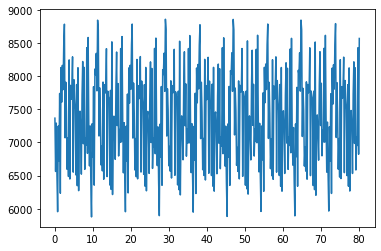

In [21]:
plt.plot(t_bar[::4],b_eff_imp)


# plt.xlabel(r'Time (t)')
# plt.ylabel(r'Effective Permeability $K_{eff}$')
# plt.axis([0, 5, 1, 1.25])

# plt.savefig('plot_K', dpi=300)

NameError: name 'b_eff' is not defined

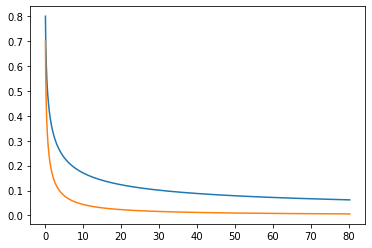

In [22]:
plt.plot(t_bar,b_1)
plt.plot(t_bar,b_2)
plt.plot(t_bar,b_eff)

plt.plot(t_bar[::4],b_eff_imp)

plt.xlabel(r'Normalized Time ($\bar {t}$)')
plt.ylabel(r'$b$')
plt.legend((r'$b_1$',r'$b_2$','$b_{eff}$','$b_{eff_imp}$'))

# plt.axis([0, 500, 0, 0.55])

# plt.plot(t_bar,1/(2*t_bar))

plt.savefig('plot_b', dpi=300)

In [23]:
b_1

array([0.80004435, 0.73545434, 0.6914812 , ..., 0.06259804, 0.06258085,
       0.06256368])

In [24]:
x1_2d = df_K.values.T
w1 = df_q.values[:,0]
d1 = sm.DescrStatsW(x1_2d, weights=w1)
df_mean = d1.mean




NameError: name 'df_K' is not defined

In [25]:
df_perc = d1.quantile([0.25,0.5,0.75]).values.T

NameError: name 'd1' is not defined

In [26]:
df_perc.shape

NameError: name 'df_perc' is not defined

In [27]:
plt.plot(t,df_perc[:,0],'k',label=r'$25^{th} percentile$')

plt.plot(t,df_perc[:,1],'--',label=r'$Median$')
plt.plot(t,df_perc[:,2],'k',label=r'$75^{th} percentile$')
plt.plot(t,df_mean,label=r'$Mean$')

# plt.axis([0, 5, 0.50, 2])

plt.xlabel(r'Time (t)')
plt.ylabel(r'Effective Permeability ($K$)')
ax.set_yscale('log')
plt.legend()

plt.savefig('plot_percentile', dpi=300)

NameError: name 'df_perc' is not defined

In [ ]:
Num_coarse = 1
Num_dx = 21
dx = 1000/20
P_initial = np.zeros([Num_coarse,Num_dx,1])+2-2/1000*np.reshape(np.arange(0,1000+dx,dx),[1,Num_dx,1])




In [ ]:
P_initial

In [ ]:
q[-1]/DP[-1]

In [ ]:
DP[0]